# Tarea Final:
##### Integrantes:
   * _Jhonatan S. Blanco | 2211497_
   * _Juan Celis_
   * _María F. Estupiñan_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lectura de datos.
Gi = pd.read_csv("Global_intensity.csv", index_col=("Datetime"))
Gap = pd.read_csv("Global_active_power.csv", index_col=("Datetime"))
Grp = pd.read_csv("Global_reactive_power.csv", index_col=("Datetime"))
V = pd.read_csv("Voltage.csv", index_col=("Datetime"))

#Concatenación de tablas.
data = Gi.merge(Gap, on='Datetime').merge(Grp, on = "Datetime").merge(V, on = "Datetime")
data = data.dropna() #Eliminar espacios vacios.

# Tablas

In [3]:
#Minutos
data

,Global_intensity,Global_active_power,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01 00:00:00,7.4,1.790,0.236,240.65
2010-01-01 00:01:00,7.4,1.780,0.234,240.07
2010-01-01 00:02:00,7.4,1.780,0.234,240.15
2010-01-01 00:03:00,7.2,1.746,0.186,240.26
2010-01-01 00:04:00,7.0,1.686,0.102,240.12
...,...,...,...,...
2010-11-26 20:58:00,4.0,0.946,0.000,240.43
2010-11-26 20:59:00,4.0,0.944,0.000,240.00
2010-11-26 21:00:00,3.8,0.938,0.000,239.82


In [4]:
#Se resetea el index para que "Datetime" se vuelva una columna y así darle
#el formato para hacer el resample.
data = data.reset_index()
data["Datetime"] = pd.to_datetime(data['Datetime'])
data = data.set_index('Datetime')

In [5]:
#Días
data_d = data.resample('D').mean()
data_d

,Global_intensity,Global_active_power,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01,3.537083,0.850175,0.114817,242.565722
2010-01-02,4.857778,1.176235,0.086656,243.631743
2010-01-03,3.757778,0.901894,0.090331,241.822778
2010-01-04,4.879028,1.171833,0.100322,241.754160
2010-01-05,3.929861,0.916776,0.133697,240.647167
...,...,...,...,...
2010-12-07,3.397222,0.770538,0.198550,240.218646
2010-12-08,1.623750,0.367846,0.117429,240.794931
2010-12-09,4.755694,1.119508,0.139832,241.619722


In [6]:
#Meses
data_m = data.resample('M').mean()
data_m

,Global_intensity,Global_active_power,Global_reactive_power,Voltage
Datetime,,,,
2010-01-31,5.430332,1.300640,0.125182,242.338522
2010-02-28,4.836624,1.157539,0.109467,242.002101
2010-03-31,4.920399,1.170015,0.136368,241.475284
2010-04-30,4.363496,1.036334,0.129557,241.442527
2010-05-31,4.551504,1.075957,0.127221,241.296151
2010-06-30,4.170282,0.975306,0.145525,240.888985
2010-07-31,3.337202,0.778947,0.138093,240.965167
2010-08-31,3.954423,0.929452,0.130815,241.422944
2010-09-30,4.223837,0.997541,0.127700,241.267517


# Visualización de datos

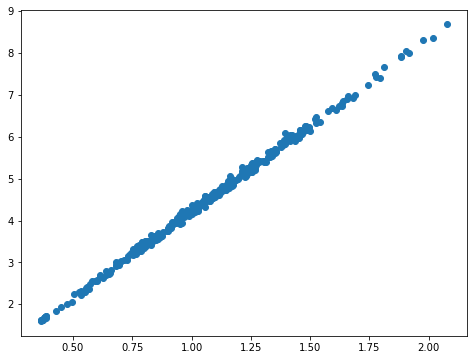

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(data_d["Global_active_power"], data_d["Global_intensity"])
plt.show()

# Ajuste de curvas

In [8]:
from scipy.optimize import curve_fit

In [9]:
def func(x, a, b):
    return a*x + b

In [13]:
data_d = data_d.dropna()
popt1, pcov1 = curve_fit(func, data_d["Global_active_power"], data_d["Global_intensity"])
popt1, pcov1

(array([4.10620168, 0.12181628]),
 array([[ 0.0001029 , -0.00010927],
        [-0.00010927,  0.00012824]]))

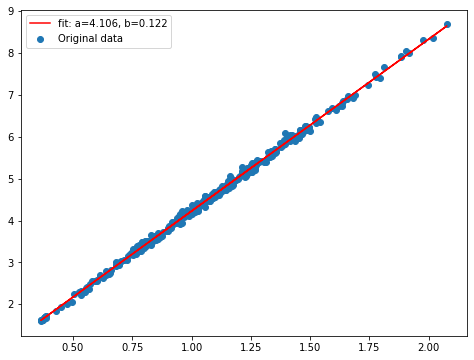

In [14]:
plt.figure(figsize=(8,6))
plt.plot(data_d["Global_active_power"], func(data_d["Global_active_power"], *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1))
plt.scatter(data_d["Global_active_power"],data_d["Global_intensity"],label="Original data")
plt.legend()
plt.show()

In [15]:
#Automatización de gráficas con el ajuste.
def get_fit(func,xdata,ydata,labelx,labely,r, 
            title = None):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    x=np.linspace(xdata.min(),xdata.max(),100)
    #Error
    E=np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    
    plt.figure(figsize=(8,6))
    plt.plot(x, func(x, *popt), 'r-',label=r'fit: {}$\pm${}'.format(np.around(tuple(popt),r),tuple(pcov)))
    plt.scatter(xdata,ydata,label="Original data")
    
    plt.title(title, fontsize=16)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend()
    
    plt.grid(linestyle=':', linewidth=1.5)
    plt.show()
    
    #Visualización de coeficientes.
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    
    #visualización de error.
    print("Error on fit is ={}".format(round(E, r + 1)))

# Global_active_power vs Global_intensity

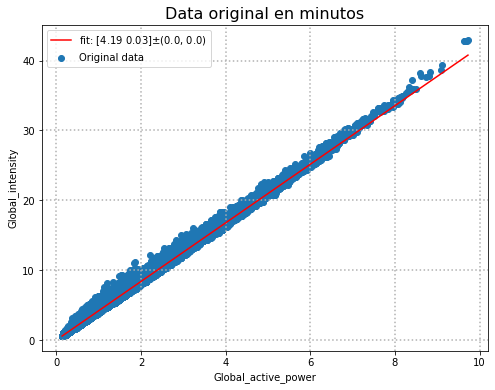

Coeficients are : [4.19 0.03]
Sigma_Coeficients are : [0. 0.]
Error on fit is =0.207


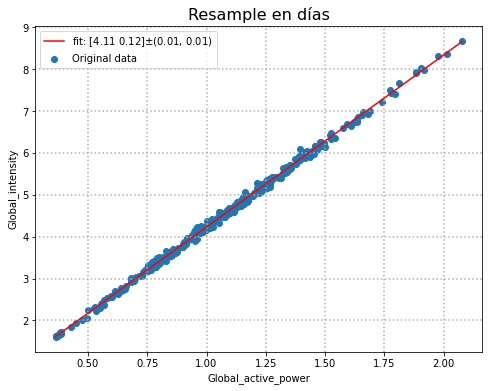

Coeficients are : [4.11 0.12]
Sigma_Coeficients are : [0.01 0.01]
Error on fit is =0.063


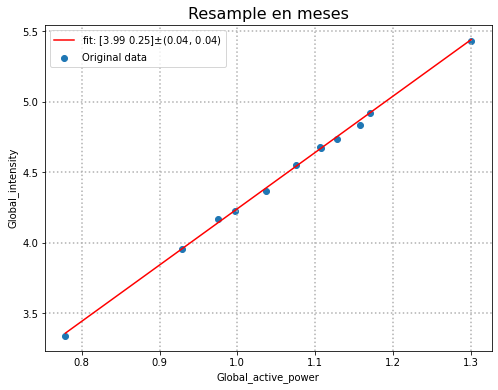

Coeficients are : [3.99 0.25]
Sigma_Coeficients are : [0.04 0.04]
Error on fit is =0.017


In [16]:
get_fit(func,data["Global_active_power"],data["Global_intensity"],
        "Global_active_power","Global_intensity",2, "Data original en minutos")

get_fit(func,data_d["Global_active_power"],data_d["Global_intensity"],
        "Global_active_power","Global_intensity",2, "Resample en días")

get_fit(func,data_m["Global_active_power"],data_m["Global_intensity"],
        "Global_active_power","Global_intensity",2, "Resample en meses")

# Global_active_power vs Voltage

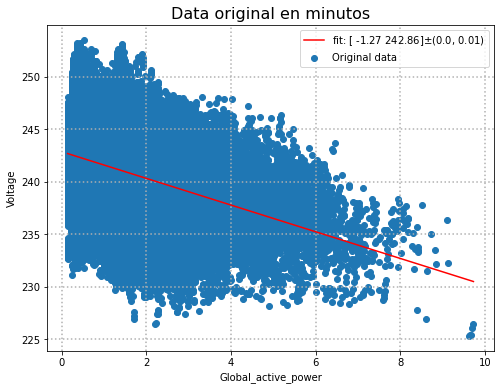

Coeficients are : [ -1.27 242.86]
Sigma_Coeficients are : [0.   0.01]
Error on fit is =2.594


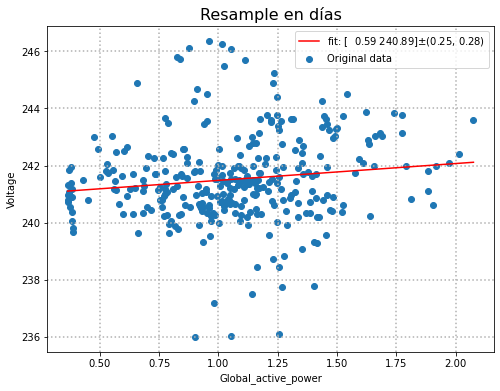

Coeficients are : [  0.59 240.89]
Sigma_Coeficients are : [0.25 0.28]
Error on fit is =1.525


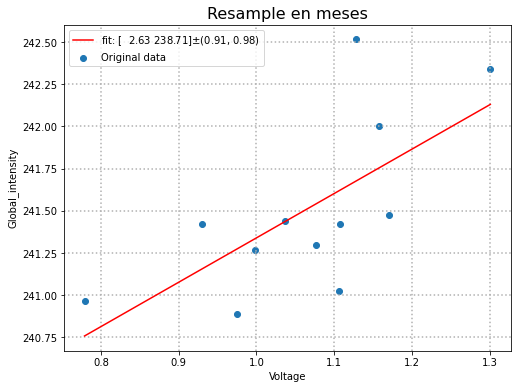

Coeficients are : [  2.63 238.71]
Sigma_Coeficients are : [0.91 0.98]
Error on fit is =0.368


In [17]:
get_fit(func,data["Global_active_power"],data["Voltage"],
        "Global_active_power","Voltage",2, "Data original en minutos")

get_fit(func,data_d["Global_active_power"],data_d["Voltage"],
        "Global_active_power","Voltage",2, "Resample en días")

get_fit(func,data_m["Global_active_power"],data_m["Voltage"],
        "Voltage","Global_intensity",2, "Resample en meses")

# Global_active_power vs Voltage + Global_intensity

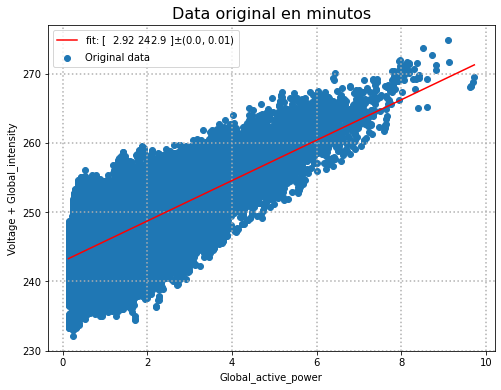

Coeficients are : [  2.92 242.9 ]
Sigma_Coeficients are : [0.   0.01]
Error on fit is =2.546


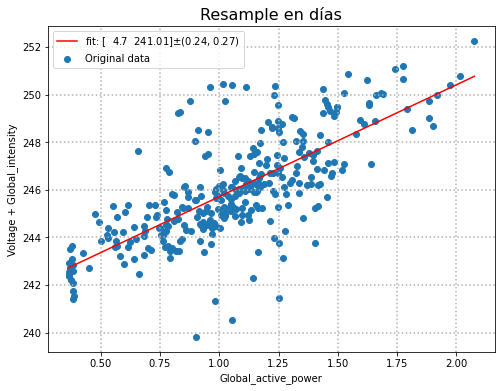

Coeficients are : [  4.7  241.01]
Sigma_Coeficients are : [0.24 0.27]
Error on fit is =1.488


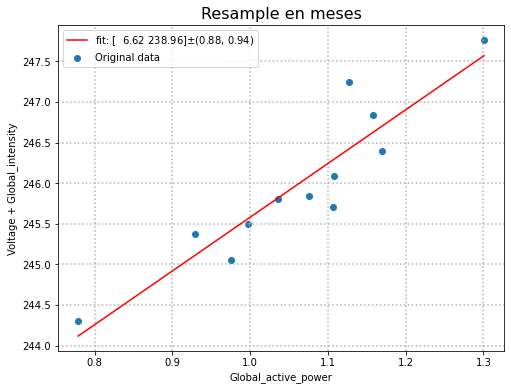

Coeficients are : [  6.62 238.96]
Sigma_Coeficients are : [0.88 0.94]
Error on fit is =0.357


In [18]:
get_fit(func,data["Global_active_power"],data["Voltage"] + data["Global_intensity"]
        ,"Global_active_power","Voltage + Global_intensity",2, "Data original en minutos")

get_fit(func,data_d["Global_active_power"],data_d["Voltage"] + data_d["Global_intensity"]
        ,"Global_active_power","Voltage + Global_intensity",2, "Resample en días")

get_fit(func,data_m["Global_active_power"],data_m["Voltage"] + data_m["Global_intensity"]
        ,"Global_active_power","Voltage + Global_intensity",2, "Resample en meses")

### Conclusiones: 
* _Como se puede observar en las gráficas, la mejor relación es la de Global_active_power vs Global_intensity, con un error de 0.207;_

* _y la peor la de Global_active_power vs Voltage, con un error de 2.594_.

* En general el error es menor con el resample en meses, seguido del de días y por último el original (en minutos).